# Project Description
**Dataset**

GTZAN

**Task 1**

Using GTZAN to train the model including

CNN
DNN
SVM
random forest
K-means clustering


**Task 2**

Similarities analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import some packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
categories = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# **Read and process the datasets**

Reading the GTZAN file from my drive and process it.

In [4]:
dir = 'drive/MyDrive/Colab Notebooks/Data/'

Two functions: play song and plot song

In [5]:
import librosa, IPython
import librosa.display as lplt

def playSong(song_path):

  audio_fp = dir + song_path
  audio_data, sr = librosa.load(audio_fp)
  audio_data, _ = librosa.effects.trim(audio_data)

  return audio_data, audio_fp


def plotSong(audio_data):

  plt.figure(figsize=(15,5))
  lplt.waveshow(audio_data)
  plt.show()

Test two function

In [6]:
# classical song example
class_audio_data, class_audio_fp = playSong("genres_original/classical/classical.00025.wav")
IPython.display.Audio(class_audio_fp)

In [7]:
# country
count_audio_data, count_audio_fp = playSong("genres_original/country/country.00025.wav")
IPython.display.Audio(count_audio_fp)

In [8]:
# metal
met_audio_data, met_audio_fp = playSong("genres_original/metal/metal.00025.wav")
IPython.display.Audio(met_audio_fp)

Plot and zoomed audio wave

In [9]:
def plotAudioWaves(audio_data):
  start = 1000
  end = 1200
  plt.figure(figsize=(16,4))
  plt.plot(audio_data[start:end])
  plt.show()

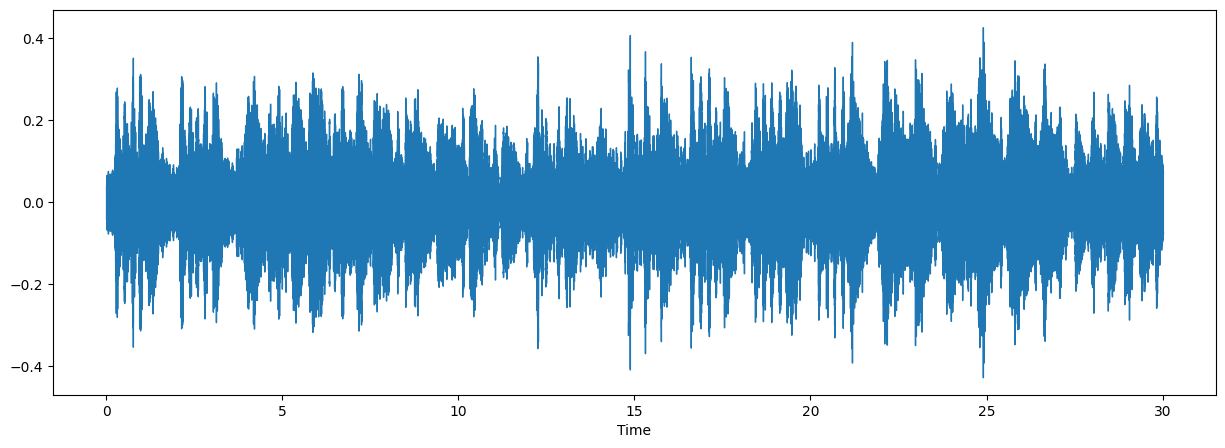

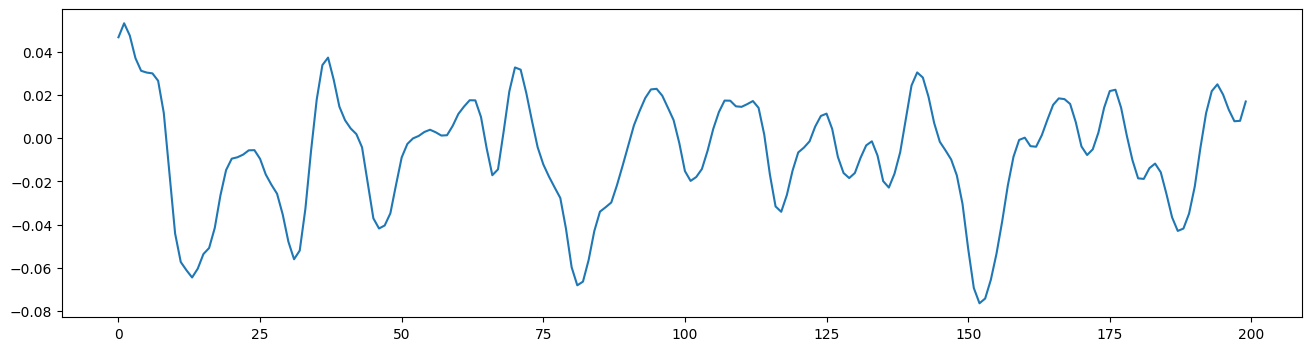

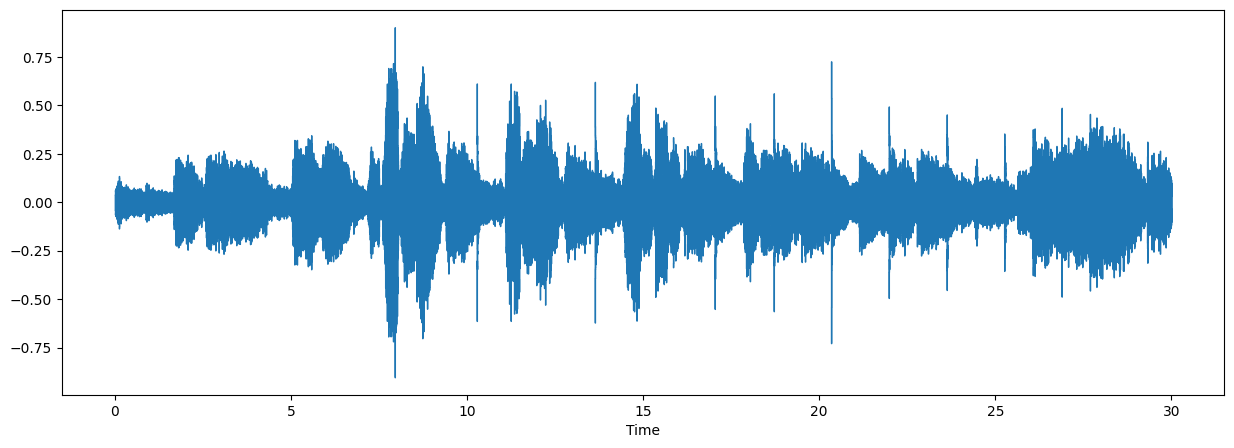

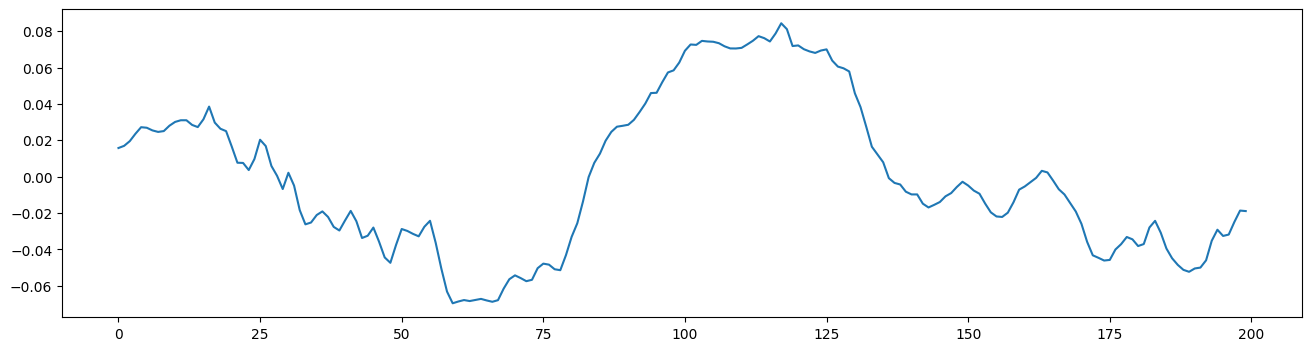

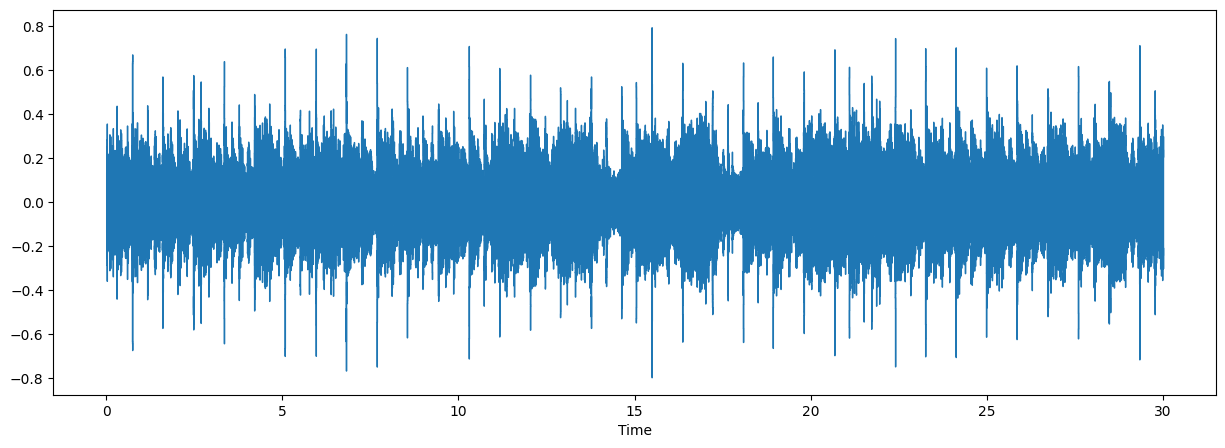

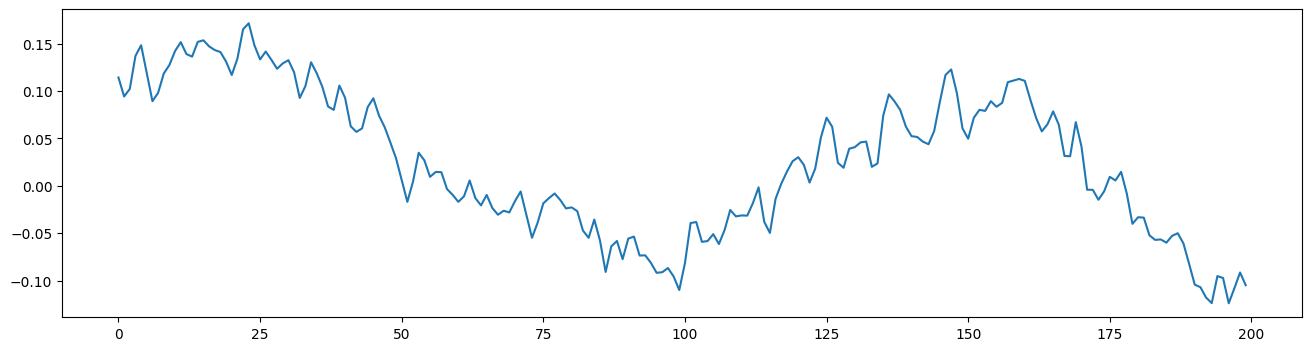

In [10]:
for audio_data in [class_audio_data, count_audio_data, met_audio_data]:
  plotSong(audio_data)
  plotAudioWaves(audio_data)

# **Convert to Mel Spectrograms**

In [11]:
import os
import matplotlib.image as mpimg

def showImg(genre):
  img = mpimg.imread("drive/MyDrive/Colab Notebooks/Data/images_original/" + genre + "/" + genre + "00025.png")
  imgplot = plt.imshow(img)
  plt.show()

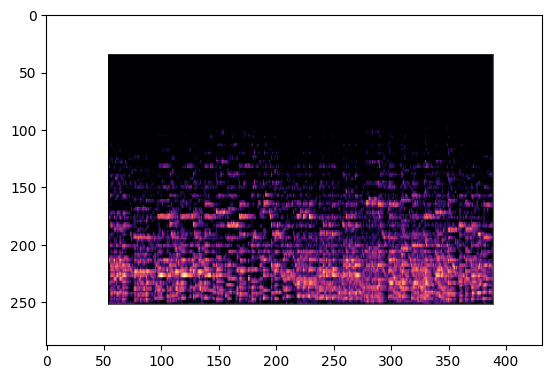

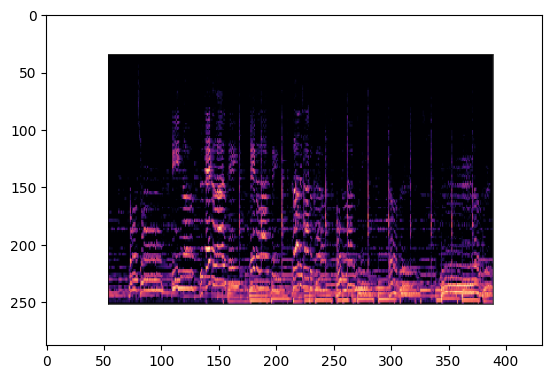

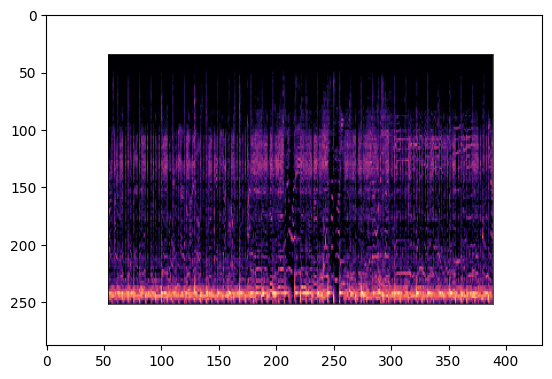

In [12]:
for genre in ['classical', 'country', 'metal']:
  showImg(genre)

db

In [13]:
from skimage.transform import resize
from skimage.io import imread

# A directory that contains one subdirectory per class
datadir = 'drive/MyDrive/Colab Notebooks/Data/images_original'

flat_data_arr=[]  # input array
target_arr=[]  # output array

for category in categories:
    print(f'loading... category : {category}')
    path = os.path.join(datadir, category)  # a path to the specific category's subdirectory
    for img in os.listdir(path):  # for each file (image) in the subdirectory
        img_array = imread(os.path.join(path, img))  # load an image from file
        img_resized = resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(category)
    print(f'loaded category : {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)  # dataframe
df['label'] = target
X_img = df.iloc[:,:-1]  # input data
y_img = df.iloc[:,-1]  # output data

loading... category : blues
loaded category : blues successfully
loading... category : classical
loaded category : classical successfully
loading... category : country
loaded category : country successfully
loading... category : disco
loaded category : disco successfully
loading... category : hiphop
loaded category : hiphop successfully
loading... category : jazz
loaded category : jazz successfully
loading... category : metal
loaded category : metal successfully
loading... category : pop
loaded category : pop successfully
loading... category : reggae
loaded category : reggae successfully
loading... category : rock
loaded category : rock successfully


In [14]:
X_img

0      1      2      3      4      5      6      7      8      9      \
0      1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1      1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2      1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3      1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4      1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
994    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
995    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
996    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
997    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
998    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

     ...  67490  67491  67492  67493  67494  67495  67496  67497  67498  67499  
0    ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
1    ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
2    ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
3    ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
4    ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
994  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
995  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
996  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
997  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  
998  ...    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0  

[999 rows x 67500 columns]

In [15]:
y_img

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
994     rock
995     rock
996     rock
997     rock
998     rock
Name: label, Length: 999, dtype: object

**Split the dataset**

8:2

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train_img, X_test_img, y_train_img, y_test_img = train_test_split(X_img, y_img, test_size=0.2, random_state=77, stratify = y_img)

print(X_train_img.shape)
print(X_test_img.shape)
print(y_train_img.shape)
print(y_test_img.shape)

(799, 67500)
(200, 67500)
(799,)
(200,)


# CSV

30s

In [17]:
features_df30 = pd.read_csv("drive/MyDrive/Colab Notebooks/Data/features_30_sec.csv")
features_df30.head(5)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

3s

In [18]:
features_df3 = pd.read_csv("drive/MyDrive/Colab Notebooks/Data/features_3_sec.csv")
features_df3.head(5)

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [19]:
print(features_df30.shape)

print(features_df30.isnull().sum())

(1000, 60)
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfc

In [20]:
#features_df30.describe()
features_df30.label.value_counts().reset_index()

index  label
0      blues    100
1  classical    100
2    country    100
3      disco    100
4     hiphop    100
5       jazz    100
6      metal    100
7        pop    100
8     reggae    100
9       rock    100

In [21]:
features_df3.label.value_counts().reset_index()

index  label
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997

In [22]:
del features_df30['filename']
del features_df3['filename']

print(features_df30.shape)
print(features_df3.shape)

(1000, 59)
(9990, 59)


In [23]:
features_df30

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0    661794          0.350088         0.088757  0.130228  0.002827   
1    661794          0.340914         0.094980  0.095948  0.002373   
2    661794          0.363637         0.085275  0.175570  0.002746   
3    661794          0.404785         0.093999  0.141093  0.006346   
4    661794          0.308526         0.087841  0.091529  0.002303   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525              2002.449060   
1               1530.176679          375850.073649              2039.036516   
2               1552.811865          156467.643368              1747.702312   
3               1070.106615          184355.942417              1596.412872   
4               1835.004266          343399.939274              1748.172116   
..                      ...                    ...                      ...   
995             2008.149458          282174.689224              2106.541053   
996             2006.843354          182114.709510              2068.942009   
997             2077.526598          231657.968040              1927.293153   
998             1398.699344          240318.731073              1818.450280   
999             1609.795082          422203.216152              1797.213044   

     spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0              85882.761315   3805.839606  ...   52.420910    -1.690215   
1             213843.755497   3550.522098  ...   55.356403    -0.731125   
2              76254.192257   3042.260232  ...   40.598766    -7.729093   
3             166441.494769   2184.745799  ...   44.427753    -3.319597   
4              88445.209036   3579.757627  ...   86.099236    -5.454034   
..                      ...           ...  ...         ...          ...   
995            88609.749506   4253.557033  ...   45.050526   -13.289984   
996            82426.016726   4149.338328  ...   33.851742   -10.848309   
997            74717.124394   4031.405321  ...   33.597008   -12.845291   
998           109090.207161   3015.631004  ...   46.324894    -4.416050   
999           120115.632927   3246.908930  ...   59.167755    -7.069775   

     mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0     36.524071    -0.408979   41.597103    -2.303523   55.062923   
1     60.314529     0.295073   48.120598    -0.283518   51.106190   
2     47.639427    -1.816407   52.382141    -3.439720   46.639660   
3     50.206673     0.636965   37.319130    -0.619121   37.259739   
4     75.269707    -0.916874   53.613918    -4.404827   62.910812   
..          ...          ...         ...          ...         ...   
995   41.754955     2.484145   36.778877    -6.713265   54.866825   
996   39.395096     1.881229   32.010040    -7.461491   39.196327   
997   36.367264     3.440978   36.001110   -12.588070   42.502201   
998   43.583942     1.556207   34.331261    -5.041897   47.227180   
999   73.760391     0.028346   76.504326    -2.025783   72.189316   

     mfcc20_mean  mfcc20_var  label  
0       1.221291   46.936035  blues  
1       0.531217   45.786282  blues  
2      -2.231258   30.573025  blues  
3      -3.407448   31.949339  blues  
4     -11.703234   55.195160  blues  
..           ...         ...    ...  
995    -1.193787   49.950665   rock  
996    -2.795338   31.773624   rock  
997    -2.106337   29.865515   rock  
998    -3.590644   41.299088   rock  
999     1.155239   49.662510   rock  

[1000 rows x 59 columns]

Split data into X(features dataframe) and y (label column)

In [24]:
X_csv30 = features_df30.iloc[:, 0:-2]
y_csv30 = features_df30[['label']]

X_csv3 = features_df3.iloc[:, 0:-2]
y_csv3 = features_df3[['label']]

In [25]:
print(X_csv30.shape)
print(y_csv30.shape, '\n')

print(X_csv3.shape)
print(y_csv3.shape, '\n')

(1000, 57)
(1000, 1) 

(9990, 57)
(9990, 1) 



Normalize the X

In [26]:
from sklearn import preprocessing

def normalization(X_csv):
  x = X_csv.values  # returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  X_norm = pd.DataFrame(x_scaled)
  return X_norm

In [27]:
X_norm30 = normalization(X_csv30)
X_norm3 = normalization(X_csv3)

X_norm30

0         1         2         3         4         5         6   \
0    0.113487  0.362279  0.695468  0.318188  0.101983  0.314117  0.040233   
1    0.113487  0.343622  0.793392  0.230894  0.085580  0.248405  0.121475   
2    0.113487  0.389832  0.640692  0.433652  0.099064  0.254261  0.049046   
3    0.113487  0.473508  0.777954  0.345856  0.229160  0.129376  0.058253   
4    0.113487  0.277759  0.681062  0.219641  0.083075  0.327270  0.110761   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.113487  0.366294  0.565355  0.188974  0.012317  0.372066  0.090548   
996  0.113487  0.461109  0.480368  0.181264  0.021099  0.371728  0.057513   
997  0.113487  0.529141  0.483246  0.194487  0.011492  0.390015  0.073870   
998  0.113487  0.387488  0.738721  0.200112  0.043603  0.214389  0.076729   
999  0.113487  0.379184  0.650272  0.125230  0.011982  0.269004  0.136778   

           7         8         9   ...        47        48        49  \
0    0.422879  0.109789  0.385532  ...  0.096032  0.564186  0.112704   
1    0.436889  0.296867  0.353329  ...  0.102385  0.570198  0.120353   
2    0.325334  0.095712  0.289224  ...  0.064359  0.622467  0.081898   
3    0.267404  0.227566  0.181068  ...  0.100536  0.565151  0.091876   
4    0.325514  0.113536  0.357017  ...  0.158487  0.383289  0.200462   
..        ...       ...       ...  ...       ...       ...       ...   
995  0.462737  0.113776  0.442001  ...  0.064006  0.599764  0.093498   
996  0.448340  0.104735  0.428856  ...  0.080931  0.666628  0.064317   
997  0.394101  0.093465  0.413981  ...  0.071380  0.601418  0.063653   
998  0.352424  0.143718  0.285865  ...  0.088801  0.441895  0.096819   
999  0.344292  0.159837  0.315035  ...  0.115910  0.599909  0.130285   

           50        51        52        53        54        55        56  
0    0.541287  0.057615  0.422444  0.082450  0.487950  0.109503  0.599189  
1    0.574685  0.118286  0.448184  0.102997  0.548800  0.099081  0.579640  
2    0.331003  0.085962  0.370988  0.116420  0.453724  0.087317  0.501381  
3    0.484549  0.092509  0.460684  0.068975  0.538690  0.062612  0.468060  
4    0.410225  0.156424  0.403875  0.120300  0.424652  0.130173  0.233047  
..        ...       ...       ...       ...       ...       ...       ...  
995  0.137363  0.070955  0.528217  0.067274  0.355114  0.108986  0.530772  
996  0.222386  0.064937  0.506174  0.052253  0.332575  0.067713  0.485401  
997  0.152848  0.057215  0.563199  0.064824  0.178146  0.076420  0.504920  
998  0.446369  0.075619  0.494291  0.059564  0.405462  0.088864  0.462871  
999  0.353962  0.152575  0.438432  0.192399  0.496317  0.154611  0.597318  

[1000 rows x 57 columns]

Train test split

In [28]:
X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30 = train_test_split(X_norm30, y_csv30, test_size=0.2, shuffle=True)
X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3 = train_test_split(X_norm3, y_csv3, test_size=0.2, shuffle=True)

In [29]:
print(X_train_csv30.shape)
print(X_test_csv30.shape)
print(y_train_csv30.shape)
print(y_test_csv30.shape)

(800, 57)
(200, 57)
(800, 1)
(200, 1)


In [30]:
print(X_train_csv3.shape)
print(X_test_csv3.shape)
print(y_train_csv3.shape)
print(y_test_csv3.shape)

(7992, 57)
(1998, 57)
(7992, 1)
(1998, 1)


In [31]:
X_train_csv30

0         1         2         3         4         5         6   \
305  0.501012  0.561491  0.586113  0.513486  0.104172  0.556944  0.140169   
523  0.113487  0.100055  0.748891  0.210149  0.031846  0.367024  0.069696   
466  0.113487  0.483159  0.782961  0.469821  0.544365  0.433264  0.246310   
403  0.095142  0.600614  0.743943  0.664996  0.486183  0.497469  0.160929   
301  0.389676  0.485509  0.663167  0.437855  0.094717  0.704384  0.179791   
..        ...       ...       ...       ...       ...       ...       ...   
958  0.113487  0.262585  0.648931  0.209364  0.007110  0.483278  0.329518   
478  0.095142  0.513815  0.837908  0.590590  1.000000  0.454735  0.424789   
81   0.113487  0.423382  0.569096  0.618649  0.194859  0.400206  0.028752   
952  0.113487  0.342997  0.824973  0.275331  0.201144  0.418240  0.577573   
606  0.095142  0.532986  0.559504  0.115091  0.003555  0.689973  0.111836   

           7         8         9   ...        47        48        49  \
305  0.639947  0.113828  0.595668  ...  0.068200  0.507165  0.086572   
523  0.460323  0.089427  0.450001  ...  0.284687  0.611432  0.178854   
466  0.607131  0.230178  0.512839  ...  0.101435  0.428878  0.111658   
403  0.548304  0.269170  0.551984  ...  0.153038  0.897531  0.242723   
301  0.716033  0.185777  0.728163  ...  0.082440  0.545768  0.135703   
..        ...       ...       ...  ...       ...       ...       ...   
958  0.724543  0.320477  0.599102  ...  0.116399  0.326840  0.133149   
478  0.661941  0.527073  0.527592  ...  0.154574  0.561512  0.178016   
81   0.405253  0.050023  0.434698  ...  0.131918  0.549955  0.081822   
952  0.593800  0.753556  0.468381  ...  0.110148  0.446857  0.112221   
606  0.641253  0.092352  0.691029  ...  0.116741  0.728983  0.117070   

           50        51        52        53        54        55        56  
305  0.565625  0.135547  0.310784  0.197762  0.528451  0.139576  0.564858  
523  0.382604  0.130922  0.312417  0.082259  0.467145  0.184709  0.627408  
466  0.471059  0.085329  0.291642  0.066659  0.466727  0.080954  0.495136  
403  0.622329  0.119244  0.446959  0.146889  0.403649  0.115311  0.450804  
301  0.586522  0.202590  0.533780  0.216862  0.456036  0.145047  0.562061  
..        ...       ...       ...       ...       ...       ...       ...  
958  0.589478  0.156433  0.623436  0.291128  0.561204  0.222020  0.612139  
478  0.420814  0.180174  0.536939  0.168463  0.628102  0.121400  0.557682  
81   0.362564  0.087278  0.472779  0.088939  0.329423  0.099288  0.647320  
952  0.419596  0.085509  0.244058  0.169944  0.382856  0.134761  0.459475  
606  0.165781  0.107784  0.669963  0.124581  0.441264  0.099266  0.698374  

[800 rows x 57 columns]

In [32]:
y_train_csv30

label
305   disco
523    jazz
466  hiphop
403  hiphop
301   disco
..      ...
958    rock
478  hiphop
81    blues
952    rock
606   metal

[800 rows x 1 columns]

# Machine Learning

# CNN : Convolutional Neural Network

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

In [ ]:
# A directory that contains one subdirectory per class
directory = 'drive/MyDrive/Colab Notebooks/Data/images_original'

# normalize the images' pixels to be between 0 to 1
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255., validation_split=0.2)  # dertemine validation size=0.2

In [ ]:
batch_size = 32
num_epochs = 10

In [ ]:
# generate training data
train_generator = data_gen.flow_from_directory(directory,
                                           target_size=(300,300),
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           subset='training')  # set as training data

# generate validation data
validation_generator = data_gen.flow_from_directory(directory,
                                           target_size=(300,300),
                                           batch_size=batch_size,
                                           class_mode='categorical',
                                           subset='validation')  # set as validation data

Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


Model

In [ ]:
# import Very Deep Convolutional Networks for Large-Scale Image Recognition
from tensorflow.keras.applications import VGG16

model = VGG16(include_top=False, input_shape=(300,300,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in model.layers:
    layer.trainable=False

In [ ]:
output=model.layers[-1].output
model_final = tf.keras.layers.Flatten()(output)
model_final = tf.keras.layers.Dense(512,activation='relu')(model_final)
model_final = tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final = tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final = tf.keras.layers.Dense(10,activation='softmax')(model_final)

In [ ]:
model = tf.keras.models.Model(model.input, model_final)

In [ ]:
# Model Compilation

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
# Model Training

history = model.fit(
                x = train_generator,
                steps_per_epoch = train_generator.samples // batch_size,
                validation_data = validation_generator,
                validation_steps = validation_generator.samples // batch_size,
                epochs = num_epochs)

Epoch 1/10
25/25 [==============================] - 1161s 47s/step - loss: 2.4234 - acc: 0.2300 - val_loss: 2.0834 - val_acc: 0.2240
Epoch 2/10
25/25 [==============================] - 1153s 47s/step - loss: 1.5754 - acc: 0.4387 - val_loss: 1.5434 - val_acc: 0.4635
Epoch 3/10
25/25 [==============================] - 1147s 46s/step - loss: 1.1294 - acc: 0.6250 - val_loss: 1.4677 - val_acc: 0.4583
Epoch 4/10
25/25 [==============================] - 1147s 46s/step - loss: 0.9444 - acc: 0.6787 - val_loss: 1.4575 - val_acc: 0.5573
Epoch 5/10
25/25 [==============================] - 1056s 42s/step - loss: 0.8679 - acc: 0.7038 - val_loss: 1.5162 - val_acc: 0.5417
Epoch 6/10
25/25 [==============================] - 1056s 43s/step - loss: 0.7867 - acc: 0.7487 - val_loss: 1.3302 - val_acc: 0.5573
Epoch 7/10
25/25 [==============================] - 1064s 43s/step - loss: 0.6224 - acc: 0.7987 - val_loss: 1.5620 - val_acc: 0.4948
Epoch 8/10
25/25 [==============================] - 1072s 43s/step - 

# PCA

In [65]:
# PCA 2 COMPONENTS
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit the model with X_train and apply the dimensionality reduction on it.
pc = pca.fit_transform(X_train_csv3)
pc_df = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])

# concatenate with target label
finalDf = pd.concat([pc_df, y_train_csv3], axis = 1)

# pca.explained_variance_ratio_

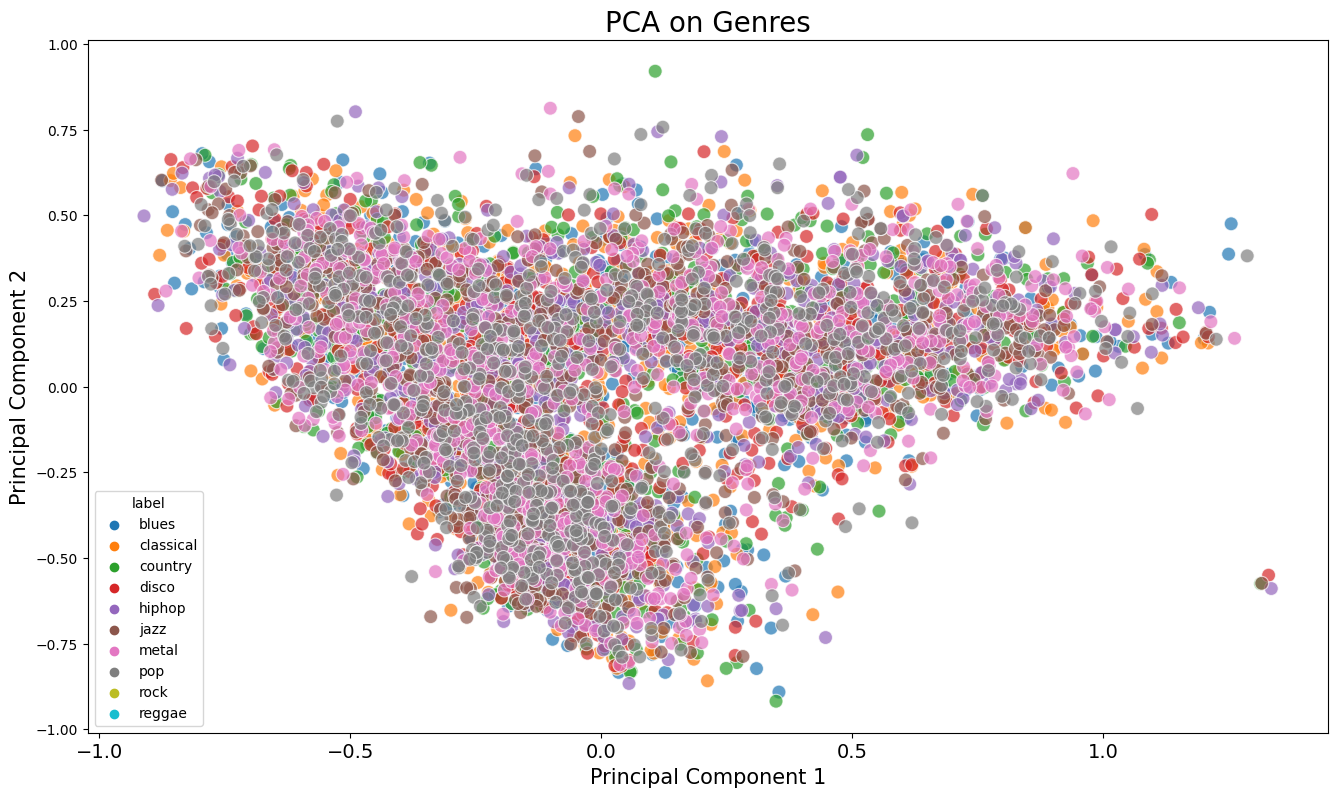

In [66]:
# Plot

import seaborn as sns

plt.figure(figsize = (16, 9))
sns.scatterplot(x="pc1", y="pc2", data=finalDf, hue="label", alpha=0.7, s=100);

plt.title('PCA on Genres', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel("Principal Component 1", fontsize=15)
plt.ylabel("Principal Component 2", fontsize=15)
plt.savefig("PCA_Scattert.png")
plt.show()

In [68]:
# Accuracy

pca.score(X_test_csv3, y_test_csv3)

61.63836846200449

# KNN

In [36]:
from sklearn.model_selection import GridSearchCV
# helps to loop through predefined hyperparameters and fit the model on the training set.
# So, in the end, you can select the best parameters from the listed hyperparameters.

param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}

In [37]:
def apply_classifier(clf, X_train, X_test, y_train, y_test, type='df', grid=False):
  """
  Apply the given clf classifier on the given training data
  Predict the labels for X_test
  Compute the Accuracy of the model

  parameters:
  type: the x and y type of data (df -- pandas dataframe or list -- np lists)
  grid: a boolean parameter which tells if use the GridSearchCV or not
  """

  # use GridSearchCV if asked
  if grid:
    GridSearchCV(clf, param_grid)

  # Train the model using the training sets
  if type == 'df':
    y_train = y_train.values.ravel()
  model = clf.fit(X_train, y_train)

  # Predict the response for test dataset
  y_pred = model.predict(X_test)

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

  return y_pred

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Create knn classifier object
knn = KNeighborsClassifier(n_neighbors=19)

In [39]:
# 30 seconds dataset
apply_classifier(knn, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)

Accuracy: 0.62


array(['classical', 'blues', 'classical', 'reggae', 'jazz', 'jazz',
       'disco', 'metal', 'metal', 'pop', 'country', 'country', 'metal',
       'classical', 'pop', 'jazz', 'disco', 'hiphop', 'pop', 'reggae',
       'rock', 'classical', 'classical', 'metal', 'hiphop', 'classical',
       'pop', 'country', 'reggae', 'rock', 'reggae', 'disco', 'metal',
       'disco', 'pop', 'reggae', 'hiphop', 'country', 'pop', 'pop',
       'classical', 'pop', 'classical', 'jazz', 'metal', 'classical',
       'disco', 'metal', 'rock', 'classical', 'reggae', 'classical',
       'rock', 'hiphop', 'disco', 'blues', 'metal', 'country', 'rock',
       'disco', 'metal', 'pop', 'country', 'metal', 'reggae', 'pop',
       'jazz', 'reggae', 'hiphop', 'disco', 'reggae', 'disco', 'disco',
       'blues', 'disco', 'country', 'rock', 'rock', 'disco', 'rock',
       'pop', 'disco', 'jazz', 'disco', 'rock', 'blues', 'metal', 'jazz',
       'rock', 'classical', 'reggae', 'country', 'hiphop', 'blues', 'pop',
       '

In [40]:
# 3 seconds dataset
y_pred_knn_csv3 = apply_classifier(knn, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)

Accuracy: 0.8098098098098098


In [41]:
# images dataset
apply_classifier(knn, X_train_img, X_test_img, y_train_img, y_test_img)

Accuracy: 0.26


array(['metal', 'hiphop', 'hiphop', 'disco', 'hiphop', 'hiphop', 'hiphop',
       'metal', 'disco', 'hiphop', 'reggae', 'hiphop', 'reggae', 'hiphop',
       'metal', 'metal', 'hiphop', 'blues', 'hiphop', 'blues', 'hiphop',
       'hiphop', 'metal', 'hiphop', 'hiphop', 'metal', 'reggae', 'metal',
       'disco', 'disco', 'hiphop', 'metal', 'hiphop', 'hiphop', 'hiphop',
       'hiphop', 'hiphop', 'hiphop', 'disco', 'hiphop', 'reggae', 'metal',
       'hiphop', 'hiphop', 'classical', 'hiphop', 'hiphop', 'metal',
       'disco', 'blues', 'blues', 'metal', 'hiphop', 'hiphop', 'hiphop',
       'disco', 'metal', 'hiphop', 'hiphop', 'hiphop', 'hiphop', 'hiphop',
       'metal', 'metal', 'hiphop', 'reggae', 'metal', 'metal', 'hiphop',
       'hiphop', 'hiphop', 'hiphop', 'rock', 'hiphop', 'hiphop', 'hiphop',
       'hiphop', 'disco', 'pop', 'hiphop', 'disco', 'blues', 'hiphop',
       'hiphop', 'hiphop', 'reggae', 'hiphop', 'hiphop', 'hiphop',
       'disco', 'disco', 'hiphop', 'hiphop', 'hipho

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [43]:
# 30 seconds dataset
apply_classifier(clf, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30)

Accuracy: 0.635


array(['classical', 'rock', 'classical', 'reggae', 'reggae', 'jazz',
       'disco', 'metal', 'metal', 'pop', 'blues', 'pop', 'metal', 'metal',
       'disco', 'blues', 'reggae', 'hiphop', 'pop', 'reggae', 'rock',
       'classical', 'classical', 'metal', 'metal', 'classical', 'pop',
       'pop', 'blues', 'rock', 'rock', 'disco', 'metal', 'rock', 'pop',
       'reggae', 'blues', 'jazz', 'pop', 'pop', 'rock', 'pop',
       'classical', 'jazz', 'metal', 'classical', 'reggae', 'reggae',
       'rock', 'classical', 'reggae', 'jazz', 'pop', 'rock', 'hiphop',
       'country', 'metal', 'country', 'metal', 'disco', 'metal', 'pop',
       'hiphop', 'metal', 'reggae', 'pop', 'jazz', 'reggae', 'hiphop',
       'reggae', 'hiphop', 'disco', 'disco', 'reggae', 'disco', 'blues',
       'blues', 'blues', 'disco', 'blues', 'hiphop', 'disco', 'jazz',
       'rock', 'rock', 'blues', 'metal', 'jazz', 'metal', 'classical',
       'jazz', 'blues', 'disco', 'country', 'pop', 'pop', 'country',
       'pop',

In [44]:
# 3 seconds dataset
apply_classifier(clf, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3)

Accuracy: 0.6516516516516516


array(['classical', 'rock', 'disco', ..., 'jazz', 'metal', 'disco'],
      dtype=object)

In [45]:
# images dataset
apply_classifier(clf, X_train_img, X_test_img, y_train_img, y_test_img)

Accuracy: 0.325


array(['metal', 'hiphop', 'pop', 'blues', 'jazz', 'hiphop', 'hiphop',
       'blues', 'blues', 'metal', 'reggae', 'disco', 'jazz', 'classical',
       'metal', 'pop', 'rock', 'classical', 'disco', 'classical',
       'country', 'disco', 'metal', 'jazz', 'blues', 'metal', 'jazz',
       'metal', 'pop', 'rock', 'hiphop', 'metal', 'jazz', 'blues',
       'country', 'metal', 'classical', 'country', 'hiphop', 'pop',
       'jazz', 'metal', 'rock', 'classical', 'classical', 'reggae',
       'country', 'metal', 'rock', 'classical', 'classical', 'disco',
       'pop', 'jazz', 'hiphop', 'blues', 'country', 'pop', 'disco',
       'classical', 'country', 'disco', 'disco', 'metal', 'rock',
       'hiphop', 'disco', 'metal', 'classical', 'classical', 'jazz',
       'country', 'classical', 'blues', 'reggae', 'blues', 'reggae',
       'blues', 'reggae', 'blues', 'blues', 'jazz', 'reggae', 'reggae',
       'jazz', 'reggae', 'disco', 'reggae', 'metal', 'jazz', 'reggae',
       'reggae', 'blues', 'disco

# SVM

In [46]:
# Import Support Vector Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# Create a svm Classifier
lin_svc = LinearSVC(dual=False)  # Linear Kernel

In [47]:
# 30 seconds dataset
y_pred_svc30 = apply_classifier(lin_svc, X_train_csv30, X_test_csv30, y_train_csv30, y_test_csv30, grid=True)
y_pred_svc30

Accuracy: 0.69


array(['classical', 'hiphop', 'classical', 'reggae', 'jazz', 'reggae',
       'pop', 'metal', 'metal', 'pop', 'country', 'reggae', 'metal',
       'classical', 'pop', 'jazz', 'pop', 'hiphop', 'pop', 'reggae',
       'rock', 'classical', 'classical', 'metal', 'rock', 'classical',
       'pop', 'country', 'reggae', 'rock', 'reggae', 'country', 'metal',
       'country', 'pop', 'reggae', 'rock', 'jazz', 'pop', 'reggae',
       'country', 'pop', 'classical', 'jazz', 'metal', 'classical',
       'reggae', 'blues', 'rock', 'classical', 'reggae', 'jazz',
       'country', 'disco', 'reggae', 'blues', 'metal', 'country', 'metal',
       'pop', 'metal', 'pop', 'reggae', 'metal', 'reggae', 'pop', 'jazz',
       'reggae', 'hiphop', 'reggae', 'reggae', 'disco', 'disco', 'blues',
       'disco', 'rock', 'blues', 'country', 'reggae', 'disco', 'hiphop',
       'disco', 'jazz', 'disco', 'blues', 'blues', 'metal', 'jazz',
       'jazz', 'classical', 'rock', 'reggae', 'hiphop', 'blues', 'pop',
       'po

In [48]:
# 3 seconds dataset
y_pred_svc3 = apply_classifier(lin_svc, X_train_csv3, X_test_csv3, y_train_csv3, y_test_csv3, grid=True)
y_pred_svc3

Accuracy: 0.6861861861861862


array(['classical', 'jazz', 'blues', ..., 'country', 'rock', 'disco'],
      dtype=object)

In [49]:
# images dataset
apply_classifier(lin_svc, X_train_img, X_test_img, y_train_img, y_test_img)

Accuracy: 0.445


array(['metal', 'reggae', 'pop', 'country', 'hiphop', 'disco', 'hiphop',
       'blues', 'blues', 'country', 'reggae', 'disco', 'reggae', 'jazz',
       'metal', 'metal', 'country', 'classical', 'pop', 'disco', 'pop',
       'reggae', 'metal', 'jazz', 'rock', 'metal', 'jazz', 'metal',
       'blues', 'blues', 'reggae', 'metal', 'jazz', 'blues', 'hiphop',
       'hiphop', 'reggae', 'country', 'blues', 'reggae', 'pop', 'metal',
       'reggae', 'blues', 'classical', 'hiphop', 'reggae', 'metal',
       'rock', 'classical', 'blues', 'disco', 'blues', 'pop', 'reggae',
       'country', 'disco', 'hiphop', 'blues', 'blues', 'reggae', 'reggae',
       'hiphop', 'metal', 'country', 'reggae', 'metal', 'metal', 'hiphop',
       'hiphop', 'reggae', 'classical', 'rock', 'reggae', 'pop', 'jazz',
       'jazz', 'rock', 'rock', 'reggae', 'rock', 'classical', 'hiphop',
       'reggae', 'jazz', 'hiphop', 'pop', 'disco', 'reggae', 'classical',
       'classical', 'hiphop', 'classical', 'hiphop', 'metal',

Are there types of songs that the model would have a very hard time distinguishing between?

Do genres that are not at all close to each other still have the same characteristics?

To answer this, I'll show the **confusion matrix**:

The (i,j) cell equal to the number of observations known to be in group i and predicted to be in group j.

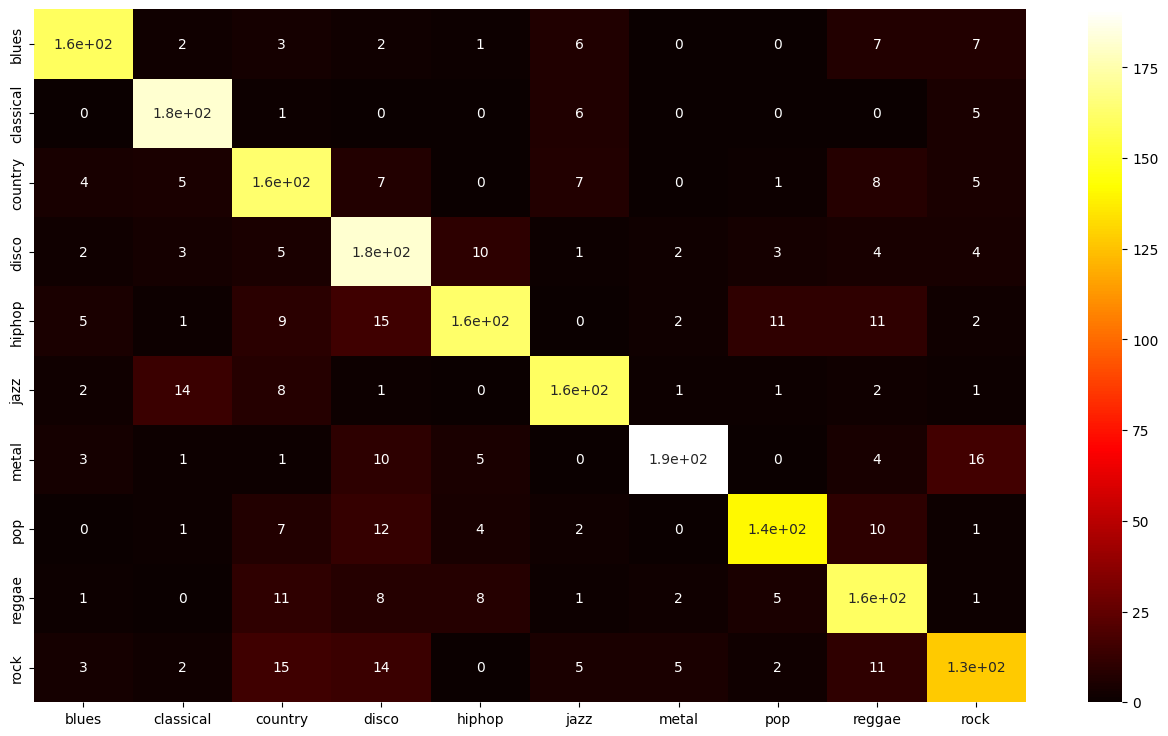

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matr = confusion_matrix(y_test_csv3, y_pred_knn_csv3)
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="hot", annot=True,
            xticklabels = categories,
            yticklabels = categories);

In [ ]:
# 3 seconds y_test data describe:

y_test_csv3.label.value_counts().reset_index()

index  label
0      metal    231
1     hiphop    218
2      disco    216
3    country    200
4     reggae    198
5  classical    194
6       jazz    191
7      blues    188
8       rock    184
9        pop    178

Similarity under same gerne

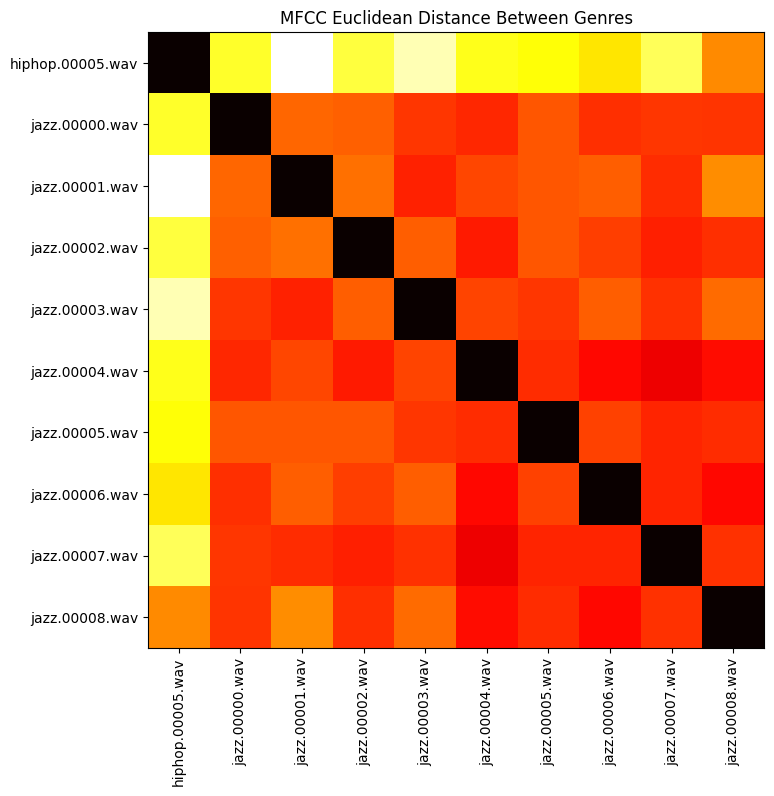

In [101]:

from scipy.spatial.distance import cdist


# Directory where audio files are located
#datapath = 'drive/MyDrive/Colab Notebooks/Data/similarity/'

# List of audio file names in the same genre (within the specified directory)
'''
audio_files = [
    'classical.00000.wav',
    'classical.00001.wav',
    'classical.00002.wav',
    'classical.00003.wav',
    'classical.00004.wav',
    'classical.00005.wav',
    'classical.00006.wav',
    'classical.00007.wav',
    'classical.00008.wav',
    'classical.00009.wav',
    # Add more file names as needed
]
'''

# Directories where audio files for two different genres are located
genre1_datapath = 'drive/MyDrive/Colab Notebooks/Data/similarity/hiphop/'
genre2_datapath = 'drive/MyDrive/Colab Notebooks/Data/similarity/jazz/'

# List of audio file names in each genre
genre1_audio_files = sorted([f for f in os.listdir(genre1_datapath) if f.endswith('.wav')])
genre2_audio_files = sorted([f for f in os.listdir(genre2_datapath) if f.endswith('.wav')])

# Function to compute MFCC features
def compute_mfcc(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

# Function to compute Euclidean distance between features
def compute_distance(feature1, feature2):
    return np.linalg.norm(feature1 - feature2)

# Function to compute distance matrix
def compute_distance_matrix(features1, features2):
    num_tracks1 = len(features1)
    num_tracks2 = len(features2)
    distance_matrix = np.zeros((num_tracks1, num_tracks2))

    for i in range(num_tracks1):
        for j in range(num_tracks2):
            features_i = features1[i]
            features_j = features2[j]
            distance = compute_distance(features_i, features_j)
            distance_matrix[i, j] = distance

    return distance_matrix

# Extract MFCC features from audio files in each genre
genre1_mfcc_features = [compute_mfcc(os.path.join(genre1_datapath, audio)) for audio in genre1_audio_files]
genre2_mfcc_features = [compute_mfcc(os.path.join(genre2_datapath, audio)) for audio in genre2_audio_files]

# Compute distance matrices for MFCC features between the two genres
mfcc_distance_matrix = compute_distance_matrix(genre1_mfcc_features, genre2_mfcc_features)

# Visualize the MFCC distance matrix with a color bar ranging from 0 to 1
plt.figure(figsize=(8, 8))
plt.imshow(mfcc_distance_matrix, cmap='hot', interpolation='nearest')
plt.title('MFCC Euclidean Distance Between Genres')
#plt.colorbar()
plt.xticks(range(len(genre2_audio_files)), genre2_audio_files, rotation=90)
plt.yticks(range(len(genre1_audio_files)), genre1_audio_files)
plt.show()

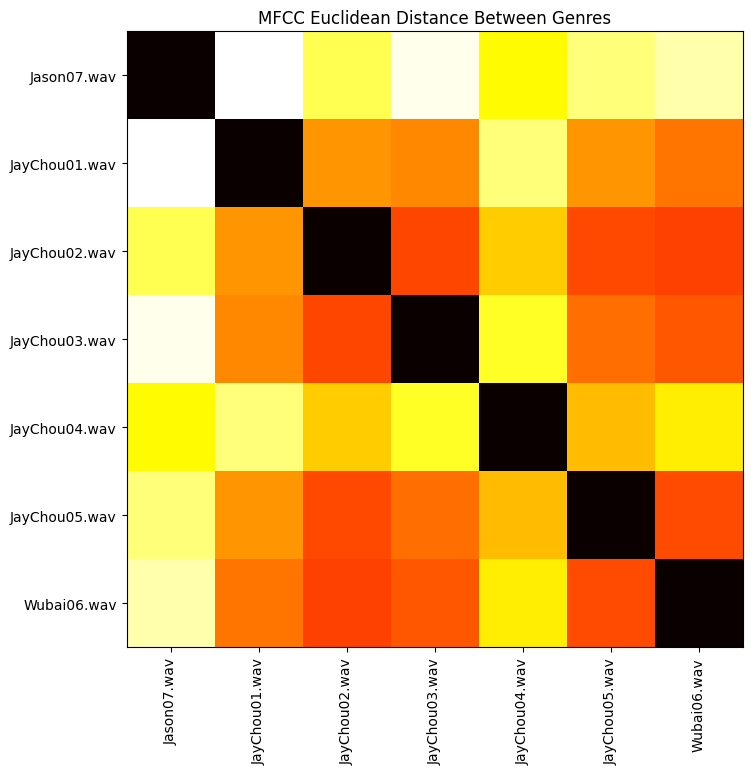

In [107]:
# Directories where audio files for two different genres are located
genre1_datapath = 'drive/MyDrive/Colab Notebooks/Data/similarity/test01/'
genre2_datapath = 'drive/MyDrive/Colab Notebooks/Data/similarity/test02/'

# List of audio file names in each genre
genre1_audio_files = sorted([f for f in os.listdir(genre1_datapath) if f.endswith('.wav')])
genre2_audio_files = sorted([f for f in os.listdir(genre2_datapath) if f.endswith('.wav')])

# Function to compute MFCC features
def compute_mfcc(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    return mfccs

# Function to compute Euclidean distance between features
def compute_distance(feature1, feature2):
    return np.linalg.norm(feature1 - feature2)

# Function to compute distance matrix
def compute_distance_matrix(features1, features2):
    num_tracks1 = len(features1)
    num_tracks2 = len(features2)
    distance_matrix = np.zeros((num_tracks1, num_tracks2))

    for i in range(num_tracks1):
        for j in range(num_tracks2):
            features_i = features1[i]
            features_j = features2[j]
            distance = compute_distance(features_i, features_j)
            distance_matrix[i, j] = distance

    return distance_matrix

# Extract MFCC features from audio files in each genre
genre1_mfcc_features = [compute_mfcc(os.path.join(genre1_datapath, audio)) for audio in genre1_audio_files]
genre2_mfcc_features = [compute_mfcc(os.path.join(genre2_datapath, audio)) for audio in genre2_audio_files]

# Compute distance matrices for MFCC features between the two genres
mfcc_distance_matrix = compute_distance_matrix(genre1_mfcc_features, genre2_mfcc_features)

# Visualize the MFCC distance matrix with a color bar ranging from 0 to 1
plt.figure(figsize=(8, 8))
plt.imshow(mfcc_distance_matrix, cmap='hot', interpolation='nearest')
plt.title('MFCC Euclidean Distance Between Genres')
#plt.colorbar()
plt.xticks(range(len(genre2_audio_files)), genre2_audio_files, rotation=90)
plt.yticks(range(len(genre1_audio_files)), genre1_audio_files)
plt.show()

In [50]:
features_df3['tempo']

0       129.199219
1       123.046875
2       123.046875
3       123.046875
4       123.046875
           ...    
9985    123.046875
9986     83.354335
9987    123.046875
9988    123.046875
9989    234.907670
Name: tempo, Length: 9990, dtype: float64

Text(0, 0.5, 'BPM')

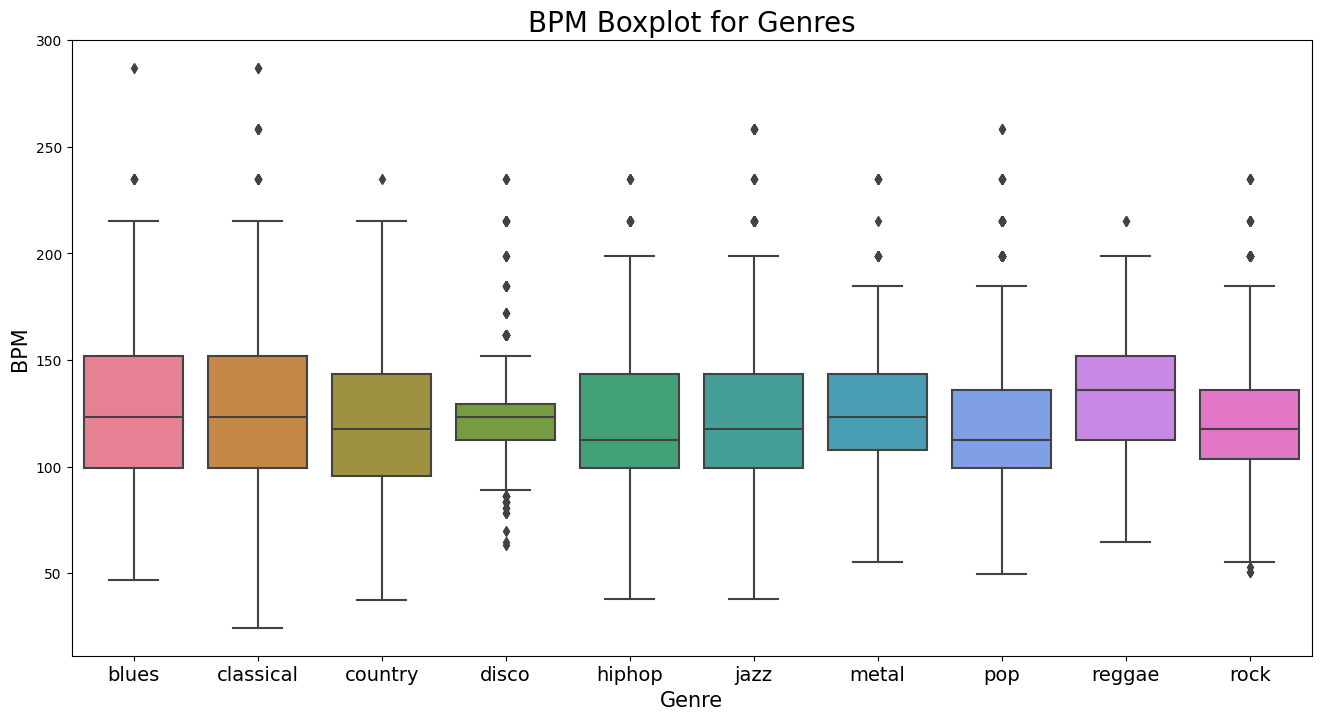

In [51]:
x = features_df3[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

In [ ]:
mean_cols = [col for col in features_df3.columns if 'mean' in col]

<ipython-input-61-d78baf2ebf9c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  features_df3[mean_cols].hist(ax = ax)


array([[<Axes: title={'center': 'chroma_stft_mean'}>,
        <Axes: title={'center': 'rms_mean'}>,
        <Axes: title={'center': 'spectral_centroid_mean'}>,
        <Axes: title={'center': 'spectral_bandwidth_mean'}>,
        <Axes: title={'center': 'rolloff_mean'}>],
       [<Axes: title={'center': 'zero_crossing_rate_mean'}>,
        <Axes: title={'center': 'harmony_mean'}>,
        <Axes: title={'center': 'perceptr_mean'}>,
        <Axes: title={'center': 'mfcc1_mean'}>,
        <Axes: title={'center': 'mfcc2_mean'}>],
       [<Axes: title={'center': 'mfcc3_mean'}>,
        <Axes: title={'center': 'mfcc4_mean'}>,
        <Axes: title={'center': 'mfcc5_mean'}>,
        <Axes: title={'center': 'mfcc6_mean'}>,
        <Axes: title={'center': 'mfcc7_mean'}>],
       [<Axes: title={'center': 'mfcc8_mean'}>,
        <Axes: title={'center': 'mfcc9_mean'}>,
        <Axes: title={'center': 'mfcc10_mean'}>,
        <Axes: title={'center': 'mfcc11_mean'}>,
        <Axes: title={'center': 'm

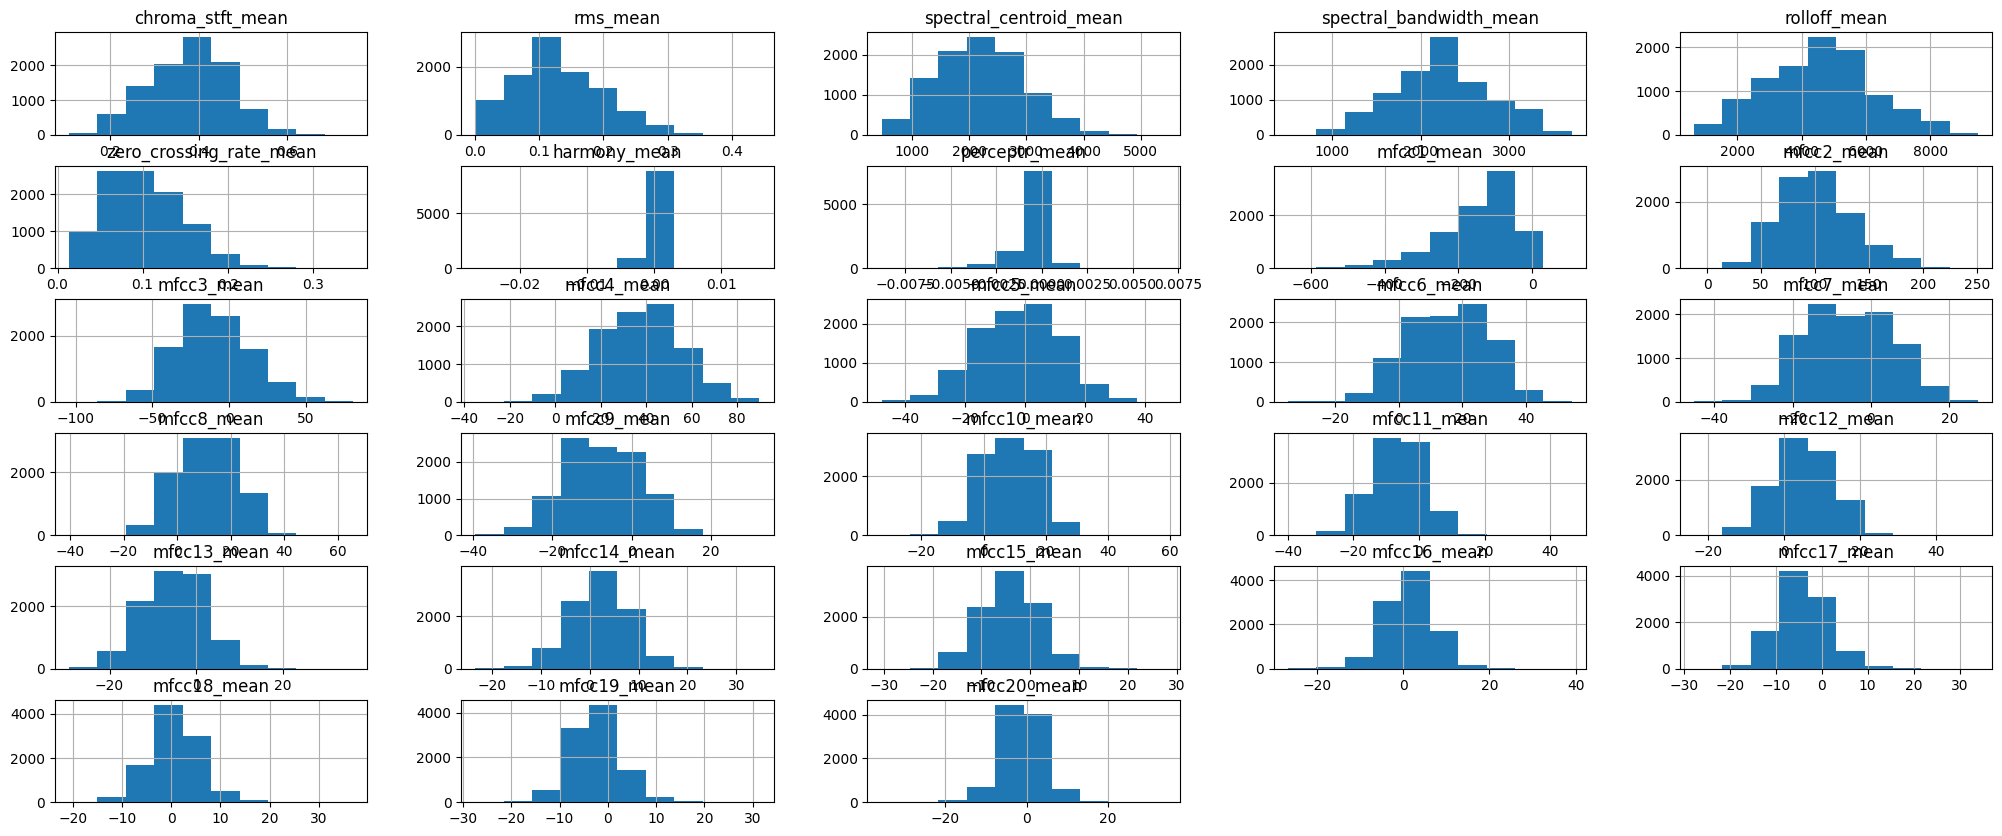

In [61]:
a4_dims = (25, 10)
fig, ax = plt.subplots(figsize=a4_dims)
features_df3[mean_cols].hist(ax = ax)